KNN Learner
Authors: Taylor Tucker and Jeff Bradley

Import statements

In [73]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

Importing and cleaning the data

In [74]:
# Importing dataset
df = pd.read_csv("./prostate-cancer-prediction.csv")
columns = ["id", "diagnosis_result", "radius", "texture", "perimeter", "area", "smoothness",
           "compactness", "symmetry", "fractal_dimension"]

df.columns = columns

# changing result M and B to 1 and 0 respectively
df.diagnosis_result = df.diagnosis_result.replace("M", 1)
df.diagnosis_result = df.diagnosis_result.replace("B", 0)

# dont need the ID column!
df.drop("id", inplace=True, axis=1)

print(df.head())

   diagnosis_result  radius  texture  perimeter  area  smoothness  \
0                 1      23       12        151   954       0.143   
1                 0       9       13        133  1326       0.143   
2                 1      21       27        130  1203       0.125   
3                 1      14       16         78   386       0.070   
4                 1       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  


Splitting the data into x and y components

In [75]:
x = df[["radius", "texture", "perimeter", "area", "smoothness",
        "compactness", "symmetry", "fractal_dimension"]]
y = df["diagnosis_result"]

Scaling the data using Max absolute value Scaler, which maintains the spatial relationships of the datapoints.

In [76]:
MaxAbsScaler(x, copy=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning:

Pass copy=    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
95      23       16        132  1264       0.091        0.131     0.210   
96      22       14         78   451       0.105        0.071     0.190   
97      19       27         62   295       0.102        0.053     0.135   
98      21       24         74   413       0.090        0.075     0.162   
99      16       27         94   643       0.098        0.114     0.188   

MaxAbsScaler(copy=    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
95      23       16        132  1264       0.091        0.131     0.210   
96      22       14         78   451       0.105        0.071     0.190   
97      19       27         62   295       0.102        0.053     0.135   
98      21       24         74   413       0.090        0.075     0.162   
99      16       27         94   643       0.098        0.114     0.188   

    fractal_dimension  
0               0.079  
1               0.057  
2        

Splitting into training and testing data on a 70-30 train test ratio

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True)

Creating the model using SK Learn API using all data
Doing a grid search to find the best hyperparameters.

In [78]:
ks = [i for i in range(1, 11)]
leaf_sizes = [i for i in range(1, 6)]
ps = [i for i in range(1, 3)]
accuracies = []
kks = []
leafs = []
pps = []


for k in ks:
    for leaf_size in leaf_sizes:
        for p in ps:
            model = KNeighborsClassifier(n_neighbors=k, leaf_size=leaf_size, p=p)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
            kks.append(k)
            leafs.append(leaf_size)
            pps.append(p)
            precision = precision_score(y_test, y_pred)
            print("K = " + str(k))
            print("Leaf Size = " + str(leaf_size))
            print("P value = " + str(p))
            print("Accuracy = " + str(accuracy))
            print("Precision = " + str(precision))
            print()


K = 1
Leaf Size = 1
P value = 1
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 1
Leaf Size = 1
P value = 2
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 1
Leaf Size = 2
P value = 1
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 1
Leaf Size = 2
P value = 2
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 1
Leaf Size = 3
P value = 1
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 1
Leaf Size = 3
P value = 2
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 1
Leaf Size = 4
P value = 1
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 1
Leaf Size = 4
P value = 2
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 1
Leaf Size = 5
P value = 1
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 1
Leaf Size = 5
P value = 2
Accuracy = 0.7333333333333333
Precision = 0.7647058823529411

K = 2
Leaf Size = 1
P value = 1
Accuracy = 0.7
Precision = 0

#### Attempt at a 3D Graph with two hyperparamters and accurac

(100,) (100,) (100,)


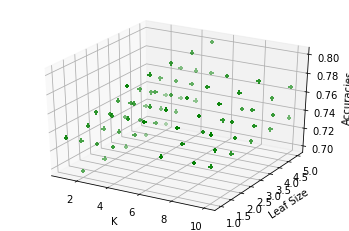

In [79]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


chart = plt.figure()
chart3d = chart.add_subplot(111, projection='3d')

 
# Create some test data.
X = np.array(kks)
Y = np.array(leafs)
Z = np.array(accuracies)
print(X.shape, Y.shape,Z.shape)



# Plot a wireframe.
chart3d.scatter(X, Y, Z, marker = '+', linewidth=2,color = 'g')
#chart3d.plot_wireframe(X, Y, Z, color='r')

chart3d.set_xlabel('K')
chart3d.set_ylabel('Leaf Size')
chart3d.set_zlabel('Accuracies')

plt.show()

Text(0, 0.5, 'Accuracy')

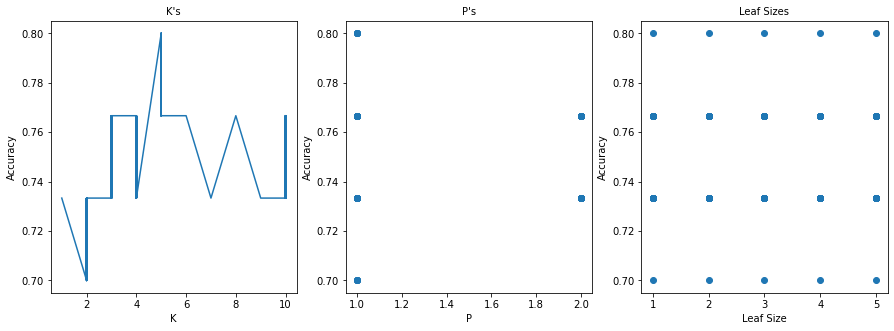

In [80]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

ax[0].set_title('K\'s', fontsize = 10)
ax[0].plot(kks,accuracies)
ax[0].set_xlabel('K')
ax[0].set_ylabel('Accuracy')

ax[1].set_title('P\'s', fontsize = 10)
ax[1].scatter(pps,accuracies)
ax[1].set_xlabel('P')
ax[1].set_ylabel('Accuracy')

ax[2].set_title('Leaf Sizes', fontsize = 10)
ax[2].scatter(leafs,accuracies)
ax[2].set_xlabel('Leaf Size')
ax[2].set_ylabel('Accuracy')

After doing grid search, the parameter which had the biggest effect on accuracy was the k value,
which when equal to five, produced an accuracy consistently of 0.9. We also found that a p=2 often changed the
accuracy from 0.86 to 0.9. Therefore, the optimal hyperparameters from our grid search
were k=5 and p=2.

Instead of looking at all the features, we wanted to see if there were any smaller group of features that could be
more deterministic of the expected result than the rest.

In [83]:
columnNames = ["radius", "texture", "perimeter", "area", "smoothness",
        "compactness", "symmetry", "fractal_dimension"]
columnNames = np.asarray(columnNames)

In [84]:
randomNames = np.random.choice(columnNames, size = 3)

##### Best Results when using ['compactness', 'area', 'smoothness']

In [85]:
randomNames

array(['compactness', 'area', 'smoothness'], dtype='<U17')

In [86]:
x = df[randomNames]
y = df["diagnosis_result"]

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True)

In [89]:
ks = [i for i in range(1, 11)]
leaf_sizes = [i for i in range(1, 6)]
ps = [i for i in range(1, 3)]
accuracies = []
kks = []
pps =[]
leafs =[]


for k in ks:
    for leaf_size in leaf_sizes:
        for p in ps:
            model = KNeighborsClassifier(n_neighbors=k, leaf_size=leaf_size, p=p)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
            kks.append(k)
            leafs.append(leaf_size)
            pps.append(p)
            precision = precision_score(y_test, y_pred)
            print("K = " + str(k))
            print("Leaf Size = " + str(leaf_size))
            print("P value = " + str(p))
            print("Accuracy = " + str(accuracy))
            print("Precision = " + str(precision))
            print()

K = 1
Leaf Size = 1
P value = 1
Accuracy = 0.8
Precision = 1.0

K = 1
Leaf Size = 1
P value = 2
Accuracy = 0.8
Precision = 1.0

K = 1
Leaf Size = 2
P value = 1
Accuracy = 0.8
Precision = 1.0

K = 1
Leaf Size = 2
P value = 2
Accuracy = 0.8
Precision = 1.0

K = 1
Leaf Size = 3
P value = 1
Accuracy = 0.8
Precision = 1.0

K = 1
Leaf Size = 3
P value = 2
Accuracy = 0.8
Precision = 1.0

K = 1
Leaf Size = 4
P value = 1
Accuracy = 0.8
Precision = 1.0

K = 1
Leaf Size = 4
P value = 2
Accuracy = 0.8
Precision = 1.0

K = 1
Leaf Size = 5
P value = 1
Accuracy = 0.8
Precision = 1.0

K = 1
Leaf Size = 5
P value = 2
Accuracy = 0.8
Precision = 1.0

K = 2
Leaf Size = 1
P value = 1
Accuracy = 0.7
Precision = 1.0

K = 2
Leaf Size = 1
P value = 2
Accuracy = 0.7
Precision = 1.0

K = 2
Leaf Size = 2
P value = 1
Accuracy = 0.7
Precision = 1.0

K = 2
Leaf Size = 2
P value = 2
Accuracy = 0.7
Precision = 1.0

K = 2
Leaf Size = 3
P value = 1
Accuracy = 0.7
Precision = 1.0

K = 2
Leaf Size = 3
P value = 2
Accuracy

Text(0, 0.5, 'Accuracy')

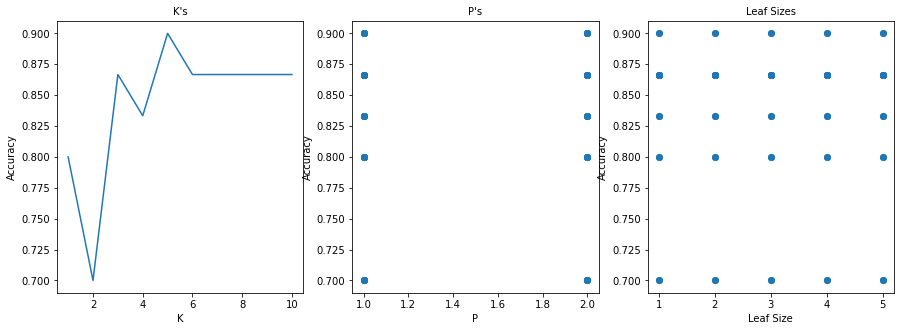

In [90]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

ax[0].set_title('K\'s', fontsize = 10)
ax[0].plot(kks,accuracies)
ax[0].set_xlabel('K')
ax[0].set_ylabel('Accuracy')

ax[1].set_title('P\'s', fontsize = 10)
ax[1].scatter(pps,accuracies)
ax[1].set_xlabel('P')
ax[1].set_ylabel('Accuracy')

ax[2].set_title('Leaf Sizes', fontsize = 10)
ax[2].scatter(leafs,accuracies)
ax[2].set_xlabel('Leaf Size')
ax[2].set_ylabel('Accuracy')

#### Turns out using the features "Compactness", "Area", and "Smoothness" we can get similar if not bettery accuracy results. This is beneficial if our data set was much much larger and we wanted to save computation time by looking at less features.